<a href="https://colab.research.google.com/github/ppiont/tensor-flow-state/blob/master/data_impute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [2]:
%cd '/gdrive/My Drive/tensor-flow-state/tensor-flow-state'

/gdrive/My Drive/tensor-flow-state/tensor-flow-state


In [0]:
sensor_list = ['RWS01_MONIBAS_0021hrl0403ra.csv', 'RWS01_MONIBAS_0021hrl0409ra.csv', 'RWS01_MONIBAS_0021hrl0414ra.csv', 'RWS01_MONIBAS_0021hrl0420ra.csv', 'RWS01_MONIBAS_0021hrl0426ra.csv']

In [0]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

In [0]:
test = pd.read_csv('data/RWS01_MONIBAS_0021hrl0403ra.csv', index_col = 0, parse_dates = True)

In [0]:
test.head()

In [0]:
test['speed_limit'] = np.where((test.index.hour < 19) & (test.index.hour >= 6), 100, 120)

In [0]:
test.speed.mask(test.speed == -99, test.speed_limit, inplace = True)

In [11]:
test.describe()

,speed,flow,speed_limit
count,4287209.00,4288108.00,4727520.00
mean,103.48,60.86,109.17
std,12.94,44.92,9.97
min,0.00,0.00,100.00
25%,98.40,18.00,100.00
50%,101.20,59.00,100.00
75%,111.75,92.00,120.00
max,205.00,269.00,120.00


In [14]:
test.isnull().sum()

speed          440311
flow           439412
speed_limit         0
dtype: int64

In [0]:
import matplotlib.pyplot as plt

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4727520 entries, 2011-01-03 00:00:00 to 2019-12-29 23:59:00
Data columns (total 2 columns):
speed    float64
flow     float64
dtypes: float64(2)
memory usage: 108.2 MB


In [0]:
test2 = test.resample('').agg({'speed': np.mean, 'flow': np.sum})

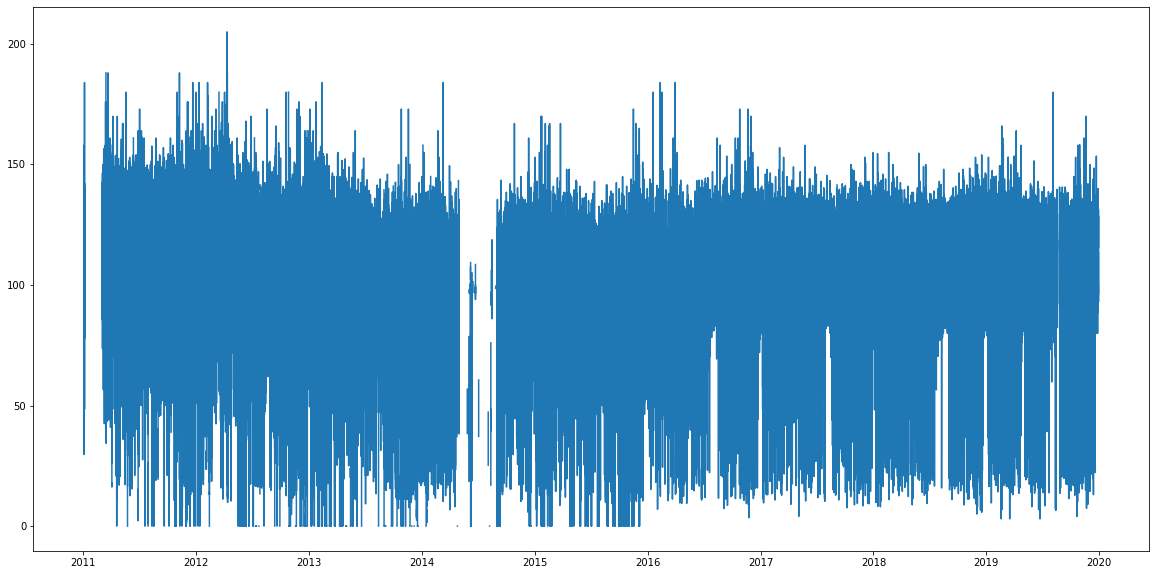

In [0]:
plt.figure(figsize=(20,10))
plt.plot(test.speed)